#### 날씨 데이터 분석

In [1]:
# 모듈 연결
import pandas as pd
import numpy as np

In [2]:
# 데이터 가져오기
wt_df = pd.read_csv('./data/weather_seoul.csv', encoding='utf-8')
wt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32762 entries, 0 to 32761
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stnId           32762 non-null  int64  
 1   stnNm           32762 non-null  object 
 2   tm              32762 non-null  object 
 3   avgTa           32416 non-null  float64
 4   minTa           32414 non-null  float64
 5   minTaHrmt       21152 non-null  float64
 6   maxTa           32414 non-null  float64
 7   maxTaHrmt       21162 non-null  float64
 8   mi10MaxRn       6386 non-null   float64
 9   mi10MaxRnHrmt   4898 non-null   float64
 10  hr1MaxRn        6428 non-null   float64
 11  hr1MaxRnHrmt    4962 non-null   float64
 12  sumRnDur        5959 non-null   float64
 13  sumRn           13817 non-null  float64
 14  maxInsWs        15553 non-null  float64
 15  maxInsWsWd      32400 non-null  float64
 16  maxInsWsHrmt    15552 non-null  float64
 17  maxWs           32351 non-null 

In [3]:
# 필요한 데이터만 추출
df = wt_df[['tm', 'stnNm', 'avgTa', 'minTa', 'maxTa', 'sumRn', 'iscs']].copy()
df.info()   # 전체적인 데이터의 정보를 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32762 entries, 0 to 32761
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tm      32762 non-null  object 
 1   stnNm   32762 non-null  object 
 2   avgTa   32416 non-null  float64
 3   minTa   32414 non-null  float64
 4   maxTa   32414 non-null  float64
 5   sumRn   13817 non-null  float64
 6   iscs    26751 non-null  object 
dtypes: float64(4), object(3)
memory usage: 1.7+ MB


In [4]:
# %%
df.head()  # 데이터의 일부를 확인

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
0,1910-01-01,서울,-5.2,-6.6,0.6,1.0,{눈}{강도0}0735-0746. {눈}{강도0}0943-0952. {눈}{강도...
1,1910-01-02,서울,-7.2,-9.4,-4.3,NaN,({눈} 1 cm)
2,1910-01-03,서울,-1.2,-8.2,3.4,0.0,{싸락우박}{강도0}0515-0526.
3,1910-01-04,서울,3.2,0.4,8.0,0.0,{싸락우박}{강도0}0430-0458. {햇무리}{강도0}0425-0507.
4,1910-01-05,서울,2.5,-0.3,7.5,0.1,{안개}{강도0}0648-{안개}0736-{안개}{강도0}0925-1053. {비...


#### 데이터 전처리

# 결측치 처리 

In [5]:
# 결측치 확인(null, NaN, None)
df.isnull().sum()  # df.isna().sum()

tm           0
stnNm        0
avgTa      346
minTa      348
maxTa      348
sumRn    18945
iscs      6011
dtype: int64

In [6]:
# 결측치 다른 값으로 대체
df[df['sumRn'].isnull()].head()

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
1,1910-01-02,서울,-7.2,-9.4,-4.3,NaN,({눈} 1 cm)
9,1910-01-10,서울,1.2,-2.8,4.5,NaN,{햇무리}{강도0}0015-0157.
10,1910-01-11,서울,3.1,0.1,7.4,NaN,NaN
12,1910-01-13,서울,2.4,-1.7,6.9,NaN,{안개}{강도0}0515-{안개}0624-{안개}{강도0}0806-0928.
22,1910-01-23,서울,-4.5,-7.2,0.6,NaN,NaN


In [7]:
df['sumRn']=df['sumRn'].fillna(0) # Nan 값을 0으로 채워준다.
df['sumRn'].isnull().sum()

0

In [8]:
df.head()

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
0,1910-01-01,서울,-5.2,-6.6,0.6,1.0,{눈}{강도0}0735-0746. {눈}{강도0}0943-0952. {눈}{강도...
1,1910-01-02,서울,-7.2,-9.4,-4.3,0.0,({눈} 1 cm)
2,1910-01-03,서울,-1.2,-8.2,3.4,0.0,{싸락우박}{강도0}0515-0526.
3,1910-01-04,서울,3.2,0.4,8.0,0.0,{싸락우박}{강도0}0430-0458. {햇무리}{강도0}0425-0507.
4,1910-01-05,서울,2.5,-0.3,7.5,0.1,{안개}{강도0}0648-{안개}0736-{안개}{강도0}0925-1053. {비...


In [9]:
df.isnull().sum()

tm          0
stnNm       0
avgTa     346
minTa     348
maxTa     348
sumRn       0
iscs     6011
dtype: int64

In [10]:
df[df['maxTa'].isnull()]

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
14853,1950-09-01,서울,NaN,NaN,NaN,0.0,{안개}{강도0}0655-1030. {비}{강도0} fd0932...0939.
14854,1950-09-02,서울,NaN,NaN,NaN,0.0,{안개}{강도0}0420-{안개}{강도1}0628-{안개}{강도2}0656-{안개}...
14855,1950-09-03,서울,NaN,NaN,NaN,0.0,{달무리}{강도0}0215-0420. {비}{강도0} fd1402...1430.
14856,1950-09-04,서울,NaN,NaN,NaN,2.3,{안개}{강도0}0450-{안개}{강도1}0655-{안개}{강도0}0802-0736...
14857,1950-09-05,서울,NaN,NaN,NaN,53.0,-{비}{강도0}-0008. {비}{강도0} fd0507-{비}{강도0}0516-...
...,...,...,...,...,...,...,...
15196,1953-11-28,서울,NaN,NaN,NaN,0.0,{연무}{강도0}0715-{연무}{강도1}0705-{연무}{강도2}0843-{연무}...
15197,1953-11-29,서울,NaN,NaN,NaN,0.0,{연무}{강도0}0710-{연무}{강도1}0753-{연무}{강도2}0845-{연무}...
15198,1953-11-30,서울,NaN,NaN,NaN,33.5,-{연무}{강도0}-{연무}{강도0}0250-. {비}{강도0} fine1145....
20027,1967-02-19,서울,-1.7,NaN,NaN,0.0,{박무}{강도0}0640-{박무}{강도1}0820-{박무}{강도0}0910-1920...


In [11]:
# 결측치 포함된 행 삭제 (dropna(axis=0) ): nan이 하나라도 있으면 삭제 
df.dropna(axis=0)



,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
0,1910-01-01,서울,-5.2,-6.6,0.6,1.0,{눈}{강도0}0735-0746. {눈}{강도0}0943-0952. {눈}{강도...
1,1910-01-02,서울,-7.2,-9.4,-4.3,0.0,({눈} 1 cm)
2,1910-01-03,서울,-1.2,-8.2,3.4,0.0,{싸락우박}{강도0}0515-0526.
3,1910-01-04,서울,3.2,0.4,8.0,0.0,{싸락우박}{강도0}0430-0458. {햇무리}{강도0}0425-0507.
4,1910-01-05,서울,2.5,-0.3,7.5,0.1,{안개}{강도0}0648-{안개}0736-{안개}{강도0}0925-1053. {비...
...,...,...,...,...,...,...,...
32752,2001-12-22,서울,-2.9,-6.2,0.8,0.0,{놀}0740-0810.
32754,2001-12-24,서울,-0.2,-3.3,3.3,0.0,{눈}0736-0752. {박무}0820-{박무}{강도0}0900-{박무}{강도0...
32755,2001-12-25,서울,1.4,-2.6,6.8,0.0,{눈}0554-{눈}{강도0}0600-0645.
32759,2001-12-29,서울,-1.5,-3.8,3.3,1.2,{박무}0510-{박무}{강도1}0600-{박무}{강도0}0900-{박무}{강도1}...


In [12]:
df.dropna(thresh=2)  # thresh=2 : NaN이 두개이상인 행 삭제 즉시적용되진 않는다.
df.dropna(how='all') #how='all' : 모든 값이 NaN인 행만 삭제 

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
0,1910-01-01,서울,-5.2,-6.6,0.6,1.0,{눈}{강도0}0735-0746. {눈}{강도0}0943-0952. {눈}{강도...
1,1910-01-02,서울,-7.2,-9.4,-4.3,0.0,({눈} 1 cm)
2,1910-01-03,서울,-1.2,-8.2,3.4,0.0,{싸락우박}{강도0}0515-0526.
3,1910-01-04,서울,3.2,0.4,8.0,0.0,{싸락우박}{강도0}0430-0458. {햇무리}{강도0}0425-0507.
4,1910-01-05,서울,2.5,-0.3,7.5,0.1,{안개}{강도0}0648-{안개}0736-{안개}{강도0}0925-1053. {비...
...,...,...,...,...,...,...,...
32757,2001-12-27,서울,-1.4,-4.7,2.7,0.0,NaN
32758,2001-12-28,서울,-1.5,-5.1,3.0,0.0,NaN
32759,2001-12-29,서울,-1.5,-3.8,3.3,1.2,{박무}0510-{박무}{강도1}0600-{박무}{강도0}0900-{박무}{강도1}...
32760,2001-12-30,서울,-4.6,-7.3,-0.6,0.0,NaN


In [13]:
# avgTa가 NaN 인 값이 있으면 해당 행 전체 삭제 
df=df.dropna(subset=['avgTa'])
df.isnull().sum()

tm          0
stnNm       0
avgTa       0
minTa       2
maxTa       2
sumRn       0
iscs     5986
dtype: int64

In [14]:
df[df['minTa'].isna()]

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
20027,1967-02-19,서울,-1.7,NaN,NaN,0.0,{박무}{강도0}0640-{박무}{강도1}0820-{박무}{강도0}0910-1920...
22458,1973-10-16,서울,12.3,NaN,NaN,0.4,-{박무}-{박무}{강도0}0300-{박무}{강도0}0600-{박무}{강도1}090...


In [15]:
df.loc[20025:20030]

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
20025,1967-02-17,서울,-5.7,-9.3,-1.5,0.0,{박무}{강도0}0920-1045.
20026,1967-02-18,서울,-4.6,-9.3,0.7,0.0,{박무}{강도0}0720-{박무}{강도1}0810-{박무}{강도0}1015-1140.
20027,1967-02-19,서울,-1.7,NaN,NaN,0.0,{박무}{강도0}0640-{박무}{강도1}0820-{박무}{강도0}0910-1920...
20028,1967-02-20,서울,1.7,-3.0,5.8,0.0,{박무}{강도0}0440-{박무}{강도1}1050-{박무}{강도2}1120-{박무}...
20029,1967-02-21,서울,5.2,4.5,6.8,0.4,-{박무}{강도0}-0120. {박무}{강도0}1320- {비}{강도0}fd07...
20030,1967-02-22,서울,8.6,2.5,13.3,45.1,{비}{강도0}fd0205...{비}{강도0}0218-{비}{강도0}fd 0237....


In [16]:
df['minTa'] = df['minTa'].fillna(method='ffill') #ffill or pad : 앞의 데이터로 채우기 
df.loc[20025:20030]

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
20025,1967-02-17,서울,-5.7,-9.3,-1.5,0.0,{박무}{강도0}0920-1045.
20026,1967-02-18,서울,-4.6,-9.3,0.7,0.0,{박무}{강도0}0720-{박무}{강도1}0810-{박무}{강도0}1015-1140.
20027,1967-02-19,서울,-1.7,-9.3,NaN,0.0,{박무}{강도0}0640-{박무}{강도1}0820-{박무}{강도0}0910-1920...
20028,1967-02-20,서울,1.7,-3.0,5.8,0.0,{박무}{강도0}0440-{박무}{강도1}1050-{박무}{강도2}1120-{박무}...
20029,1967-02-21,서울,5.2,4.5,6.8,0.4,-{박무}{강도0}-0120. {박무}{강도0}1320- {비}{강도0}fd07...
20030,1967-02-22,서울,8.6,2.5,13.3,45.1,{비}{강도0}fd0205...{비}{강도0}0218-{비}{강도0}fd 0237....


In [17]:
df['maxTa'] = df['maxTa'].fillna(method='bfill') #backfill : 뒤 데이터로 채우기
df.loc[20025:20030]

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
20025,1967-02-17,서울,-5.7,-9.3,-1.5,0.0,{박무}{강도0}0920-1045.
20026,1967-02-18,서울,-4.6,-9.3,0.7,0.0,{박무}{강도0}0720-{박무}{강도1}0810-{박무}{강도0}1015-1140.
20027,1967-02-19,서울,-1.7,-9.3,5.8,0.0,{박무}{강도0}0640-{박무}{강도1}0820-{박무}{강도0}0910-1920...
20028,1967-02-20,서울,1.7,-3.0,5.8,0.0,{박무}{강도0}0440-{박무}{강도1}1050-{박무}{강도2}1120-{박무}...
20029,1967-02-21,서울,5.2,4.5,6.8,0.4,-{박무}{강도0}-0120. {박무}{강도0}1320- {비}{강도0}fd07...
20030,1967-02-22,서울,8.6,2.5,13.3,45.1,{비}{강도0}fd0205...{비}{강도0}0218-{비}{강도0}fd 0237....


In [18]:
df[df['iscs'].isnull()].head()

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
10,1910-01-11,서울,3.1,0.1,7.4,0.0,NaN
17,1910-01-18,서울,-8.0,-12.4,-3.0,0.0,NaN
18,1910-01-19,서울,-4.5,-10.9,-0.1,0.0,NaN
22,1910-01-23,서울,-4.5,-7.2,0.6,0.0,NaN
23,1910-01-24,서울,-5.9,-10.3,-1.2,0.0,NaN


In [19]:
df['iscs']=df['iscs'].fillna(0) 

In [20]:
df['iscs'].isnull().sum()

0

In [21]:
df['iscs'] = df['iscs'].replace(0, '-')
df.loc[32757:32850]

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
32757,2001-12-27,서울,-1.4,-4.7,2.7,0.0,-
32758,2001-12-28,서울,-1.5,-5.1,3.0,0.0,-
32759,2001-12-29,서울,-1.5,-3.8,3.3,1.2,{박무}0510-{박무}{강도1}0600-{박무}{강도0}0900-{박무}{강도1}...
32760,2001-12-30,서울,-4.6,-7.3,-0.6,0.0,-
32761,2001-12-31,서울,-2.1,-6.8,1.3,6.7,{눈}1415-{눈}{강도0}1500-1535. {눈}1552-{눈}{강도0}18...


In [22]:
df.isnull().sum()

tm       0
stnNm    0
avgTa    0
minTa    0
maxTa    0
sumRn    0
iscs     0
dtype: int64

## 데이터 조회 및 관리

In [23]:
df.dtypes

tm        object
stnNm     object
avgTa    float64
minTa    float64
maxTa    float64
sumRn    float64
iscs      object
dtype: object

In [24]:
df.columns

Index(['tm', 'stnNm', 'avgTa', 'minTa', 'maxTa', 'sumRn', 'iscs'], dtype='object')

In [25]:
#2000-01-01 이후 날짜 조회 
df[df['tm'] >= '2000-01-01']

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
32031,2000-01-01,서울,5.5,1.8,9.9,0.0,-{박무}-{박무}{강도0}0300-{박무}{강도0}0600-{박무}{강도0}090...
32032,2000-01-02,서울,4.2,-0.9,6.9,6.0,{비}0445-{비}{강도0}0600-{비}{강도0}0900-1135. {뇌전}{...
32033,2000-01-03,서울,-2.2,-4.6,0.1,0.0,{박무}0320-{박무}{강도0}0600-0740.
32034,2000-01-04,서울,0.3,-4.3,4.3,0.0,{연무}1035-{연무}{강도0}1200-{연무}{강도0}1500-1750.
32035,2000-01-05,서울,2.8,0.1,4.6,18.4,{눈}0610-{눈}{강도0}0900-{진눈깨비}0920-{비}0950-{비}{강도...
...,...,...,...,...,...,...,...
32757,2001-12-27,서울,-1.4,-4.7,2.7,0.0,-
32758,2001-12-28,서울,-1.5,-5.1,3.0,0.0,-
32759,2001-12-29,서울,-1.5,-3.8,3.3,1.2,{박무}0510-{박무}{강도1}0600-{박무}{강도0}0900-{박무}{강도1}...
32760,2001-12-30,서울,-4.6,-7.3,-0.6,0.0,-


In [26]:
df.tail()

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
32757,2001-12-27,서울,-1.4,-4.7,2.7,0.0,-
32758,2001-12-28,서울,-1.5,-5.1,3.0,0.0,-
32759,2001-12-29,서울,-1.5,-3.8,3.3,1.2,{박무}0510-{박무}{강도1}0600-{박무}{강도0}0900-{박무}{강도1}...
32760,2001-12-30,서울,-4.6,-7.3,-0.6,0.0,-
32761,2001-12-31,서울,-2.1,-6.8,1.3,6.7,{눈}1415-{눈}{강도0}1500-1535. {눈}1552-{눈}{강도0}18...


## 데이터시각화

In [27]:
# 1961-01-01 ~ 1961-12-31
wtf1 = df[(df['tm']>='1961-01-01') & (df['tm']<='1961-12-31')] # 조건 2개 이상일때는 괄호로 묶어준다. 
wtf1.head()


,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
17787,1961-01-01,서울,-9.8,-15.0,-4.9,0.0,{박무}{강도0}0540-{박무}{강도1}0615-{박무}{강도2}0640-{박무}...
17788,1961-01-02,서울,-6.2,-12.3,0.2,0.0,-{박무}{강도0}-{박무}{강도1}0905-{박무}{강도0}1010-1205. ...
17789,1961-01-03,서울,-1.1,-4.7,0.3,3.7,{박무}{강도0}0730-2050. {달무리}{강도0}2235-2320. {눈}...
17790,1961-01-04,서울,-9.5,-13.7,-4.7,0.0,{연무}{강도0}0835-1230. {연무}{강도0}1650-
17791,1961-01-05,서울,-10.8,-16.5,-6.2,0.0,-{연무}{강도0}-0256. {박무}{강도0}0616-{박무}{강도1}0905-...


In [28]:
# 2001-01-01 ~ 2001-12-31
wtf2 = df[(df['tm']>='2001-01-01') & (df['tm']<='2001-12-31')] # 2001년 데이터 추출 
wtf2.head()

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
32397,2001-01-01,서울,-4.5,-9.5,-0.8,1.2,{박무}0120-{박무}{강도0}0300-{박무}{강도0}0600-0720. {눈...
32398,2001-01-02,서울,-4.3,-9.1,-0.2,0.0,-{박무}-{박무}{강도0}0300-{박무}{강도0}0600-{박무}{강도0}090...
32399,2001-01-03,서울,-8.3,-10.4,-5.2,0.0,-
32400,2001-01-04,서울,-9.8,-12.5,-6.7,0.0,-
32401,2001-01-05,서울,-6.8,-11.0,-2.2,0.0,{눈}1648-1720.


- matplotlib 모듈을 위한 시각화

In [29]:
%pip install matplotlib
import matplotlib.pyplot as plt

#한글 폰트 설정 
import matplotlib.font_manager as fm

plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False



Note: you may need to restart the kernel to use updated packages.


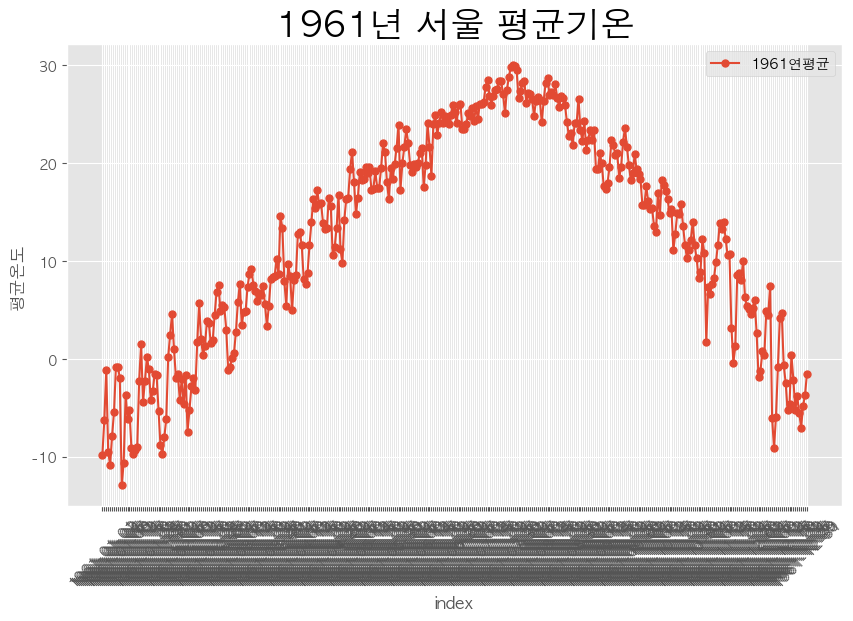

In [30]:
# 1961년 데이터를 이용한 차트 그리기 
plt.style.use('ggplot') # 차트 스타일 지정 
plt.figure(figsize=(10,6)) #차트 크기 지정
plt.xticks(rotation = 45, size=10) # x축 라벨 회전/글자크기 10

#차트 출력(꺾은선형) 
#plt.plot(x축, y축, 마커, 마커크기, 라벨)
plt.plot(wtf1['tm'],wtf1['avgTa'], marker='o', markersize=5, label='1961연평균') 
plt.title('1961년 서울 평균기온', size=25) 
plt.xlabel ('index')
plt.ylabel('평균온도')
plt.legend() # 범례표시

plt.show()


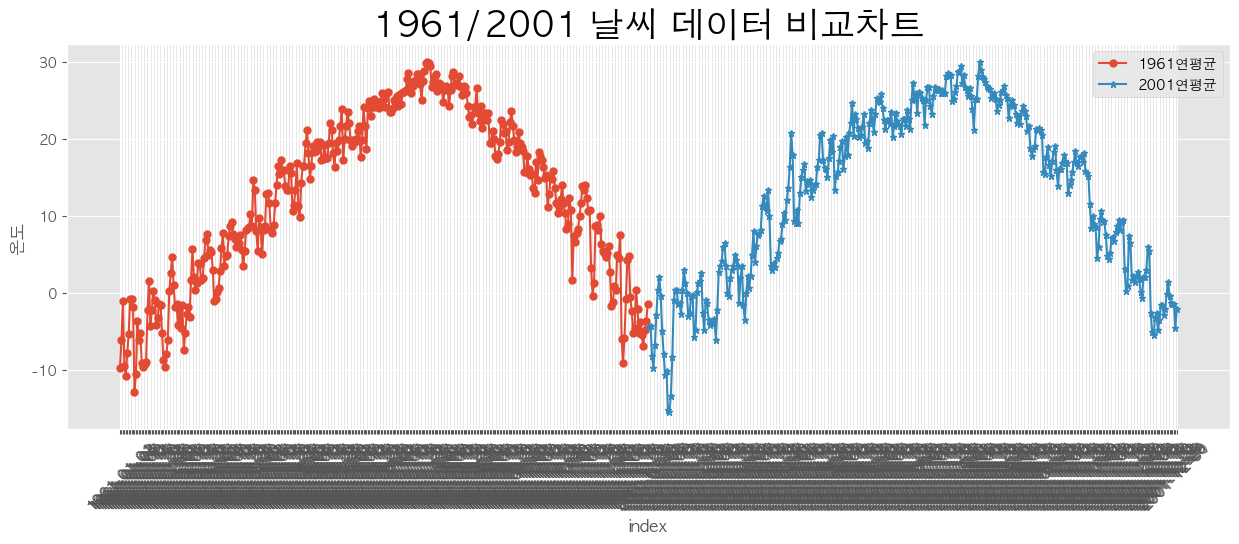

In [31]:
#1961/2001 날씨 데이터 비교 차트 

plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.xticks(rotation=45, size=10)

plt.plot(wtf1['tm'],wtf1['avgTa'], marker='o', markersize=5, label='1961연평균') 
plt.plot(wtf2['tm'],wtf2['avgTa'], marker='*', markersize=5, label='2001연평균') 

plt.title('1961/2001 날씨 데이터 비교차트', size=25)
plt.xlabel('index',size=12)
plt.ylabel('온도',size=12)
plt.legend(loc='best')

# 인덱스가 다르다보니 겹쳐지지않는 것 .
plt.show()

In [32]:
len(wtf1), len(wtf2)

(365, 365)

In [33]:
print(wtf1.index)
print(wtf2.index)

Int64Index([17787, 17788, 17789, 17790, 17791, 17792, 17793, 17794, 17795,
            17796,
            ...
            18142, 18143, 18144, 18145, 18146, 18147, 18148, 18149, 18150,
            18151],
           dtype='int64', length=365)
Int64Index([32397, 32398, 32399, 32400, 32401, 32402, 32403, 32404, 32405,
            32406,
            ...
            32752, 32753, 32754, 32755, 32756, 32757, 32758, 32759, 32760,
            32761],
           dtype='int64', length=365)


In [34]:
#index 재설정(기존 Index 삭제)
wtf1=wtf1.reset_index(drop=True)
wtf2=wtf2.reset_index(drop=True)

print(wtf1.index)
print(wtf2.index)

RangeIndex(start=0, stop=365, step=1)
RangeIndex(start=0, stop=365, step=1)


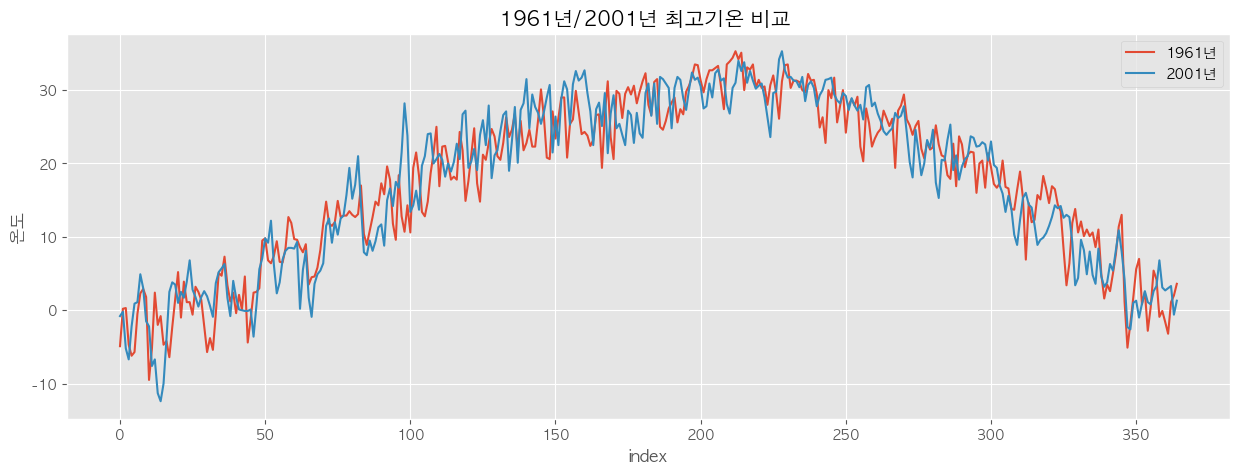

In [35]:
#index를 같이 사용하는 차트 작성
plt.style.use('ggplot')
plt.figure(figsize=(15,5))

plt.plot(wtf1.index, wtf1['maxTa'], label='1961년') 
plt.plot(wtf2.index, wtf2['maxTa'], label='2001년')

plt.title('1961년/2001년 최고기온 비교 ') 
plt.xlabel('index')
plt.ylabel('온도')
plt.legend()

plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32761
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tm      32416 non-null  object 
 1   stnNm   32416 non-null  object 
 2   avgTa   32416 non-null  float64
 3   minTa   32416 non-null  float64
 4   maxTa   32416 non-null  float64
 5   sumRn   32416 non-null  float64
 6   iscs    32416 non-null  object 
dtypes: float64(4), object(3)
memory usage: 3.0+ MB


In [37]:
df.head()

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs
0,1910-01-01,서울,-5.2,-6.6,0.6,1.0,{눈}{강도0}0735-0746. {눈}{강도0}0943-0952. {눈}{강도...
1,1910-01-02,서울,-7.2,-9.4,-4.3,0.0,({눈} 1 cm)
2,1910-01-03,서울,-1.2,-8.2,3.4,0.0,{싸락우박}{강도0}0515-0526.
3,1910-01-04,서울,3.2,0.4,8.0,0.0,{싸락우박}{강도0}0430-0458. {햇무리}{강도0}0425-0507.
4,1910-01-05,서울,2.5,-0.3,7.5,0.1,{안개}{강도0}0648-{안개}0736-{안개}{강도0}0925-1053. {비...


In [38]:
df['month'] = df['tm'].str[5:7]

df.head()

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs,month
0,1910-01-01,서울,-5.2,-6.6,0.6,1.0,{눈}{강도0}0735-0746. {눈}{강도0}0943-0952. {눈}{강도...,01
1,1910-01-02,서울,-7.2,-9.4,-4.3,0.0,({눈} 1 cm),01
2,1910-01-03,서울,-1.2,-8.2,3.4,0.0,{싸락우박}{강도0}0515-0526.,01
3,1910-01-04,서울,3.2,0.4,8.0,0.0,{싸락우박}{강도0}0430-0458. {햇무리}{강도0}0425-0507.,01
4,1910-01-05,서울,2.5,-0.3,7.5,0.1,{안개}{강도0}0648-{안개}0736-{안개}{강도0}0925-1053. {비...,01


In [39]:
df['year']=df['tm'].str.split('-').str[0]
df.head()

,tm,stnNm,avgTa,minTa,maxTa,sumRn,iscs,month,year
0,1910-01-01,서울,-5.2,-6.6,0.6,1.0,{눈}{강도0}0735-0746. {눈}{강도0}0943-0952. {눈}{강도...,01,1910
1,1910-01-02,서울,-7.2,-9.4,-4.3,0.0,({눈} 1 cm),01,1910
2,1910-01-03,서울,-1.2,-8.2,3.4,0.0,{싸락우박}{강도0}0515-0526.,01,1910
3,1910-01-04,서울,3.2,0.4,8.0,0.0,{싸락우박}{강도0}0430-0458. {햇무리}{강도0}0425-0507.,01,1910
4,1910-01-05,서울,2.5,-0.3,7.5,0.1,{안개}{강도0}0648-{안개}0736-{안개}{강도0}0925-1053. {비...,01,1910


In [40]:
# 필드 순서 변경하기

print(df.columns)
df= df[['tm','year','month','stnNm','avgTa','minTa','maxTa','sumRn','iscs' ]]
df.head()

Index(['tm', 'stnNm', 'avgTa', 'minTa', 'maxTa', 'sumRn', 'iscs', 'month',
       'year'],
      dtype='object')


,tm,year,month,stnNm,avgTa,minTa,maxTa,sumRn,iscs
0,1910-01-01,1910,01,서울,-5.2,-6.6,0.6,1.0,{눈}{강도0}0735-0746. {눈}{강도0}0943-0952. {눈}{강도...
1,1910-01-02,1910,01,서울,-7.2,-9.4,-4.3,0.0,({눈} 1 cm)
2,1910-01-03,1910,01,서울,-1.2,-8.2,3.4,0.0,{싸락우박}{강도0}0515-0526.
3,1910-01-04,1910,01,서울,3.2,0.4,8.0,0.0,{싸락우박}{강도0}0430-0458. {햇무리}{강도0}0425-0507.
4,1910-01-05,1910,01,서울,2.5,-0.3,7.5,0.1,{안개}{강도0}0648-{안개}0736-{안개}{강도0}0925-1053. {비...


In [41]:
# 1960이후 데이터 중 7월 데이터만 추출 
df_7 = df[(df['month'] =='07') &(df['year'] >= '1960')]

# 년에 대한 고유값 확인 
year_lst = df_7['year'].unique()
year_lst 


array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001'], dtype=object)

In [42]:
# 각 년도별 7월 최대 온도 구하기 ()

yearTa = list() # 년도별 온도 저장할 리스트 

for y in year_lst:
    yeardf = df_7[df_7['year'] ==y][['year', 'maxTa']] #년도별 데이터 프레임 
    maxta = yeardf.iloc[0, -1] #년도별 7월 최고온도의 첫번째 값으로 초기화 iloc: 행번호, 위치번호로 접근 
    for i in yeardf.index:
        if maxta < yeardf.loc[i, 'maxTa']:  # 최고온도와 현재 온도를 비교 
            maxta = yeardf.loc[i, 'maxTa']  # 현재온도가 최고온도보다 높으면 최고온도 갱신
    yearTa.append(maxta) 
    
print(yearTa)
print(year_lst)

[32.4, 34.4, 35.0, 33.1, 33.6, 35.2, 31.4, 35.0, 34.2, 32.3, 32.2, 32.0, 35.6, 34.5, 30.7, 33.4, 33.5, 35.0, 36.1, 32.2, 30.3, 35.2, 33.7, 30.9, 34.7, 35.4, 31.7, 31.2, 31.6, 33.3, 34.2, 32.0, 32.4, 31.1, 38.4, 33.6, 34.6, 36.1, 32.2, 34.9, 34.2, 32.8]
['1960' '1961' '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969'
 '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979'
 '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989'
 '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001']


In [45]:
yearMaxTa_df = pd.DataFrame([year_lst, yearTa]).T  # DataFrame 생성 및 행과 열을 바꿈
yearMaxTa_df.columns = ['year', 'maxTa']
yearMaxTa_df.head()

,year,maxTa
0,1960,32.4
1,1961,34.4
2,1962,35.0
3,1963,33.1
4,1964,33.6


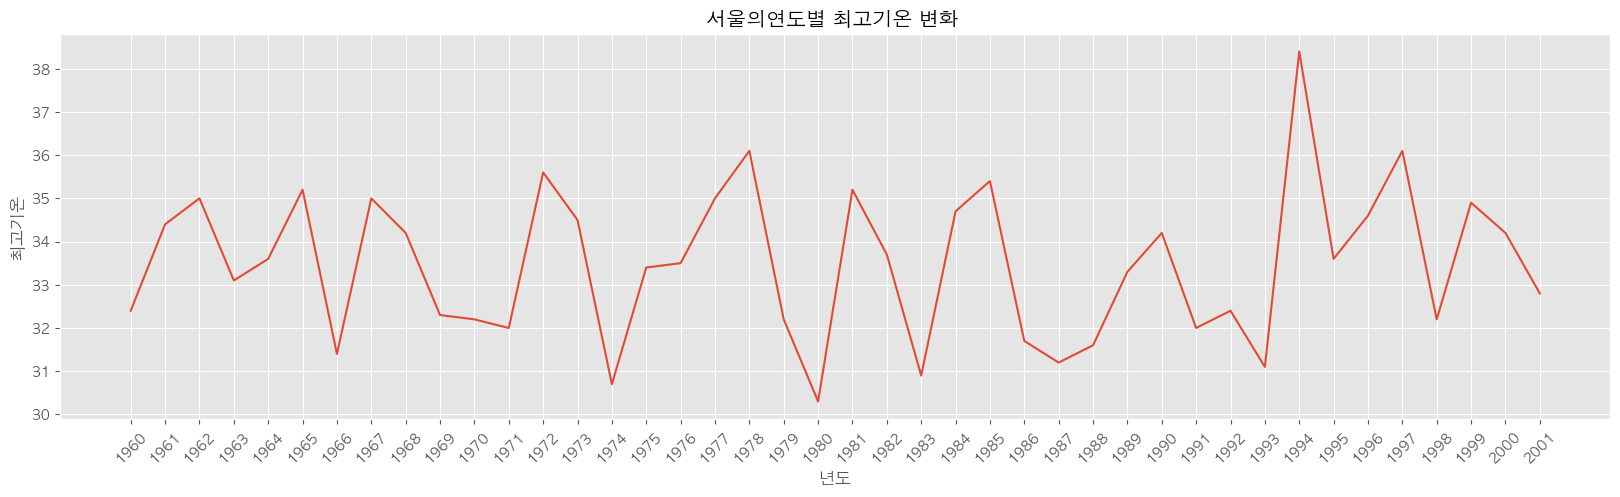

In [46]:
plt.style.use('ggplot')
plt.figure(figsize=(20,5))
plt.xticks(rotation = 45, size =10)

plt.plot(yearMaxTa_df['year'],yearMaxTa_df['maxTa'],label = '최고기온')
plt.title('서울의연도별 최고기온 변화 ')
plt.xlabel('년도')
plt.ylabel('최고기온')

plt.show()

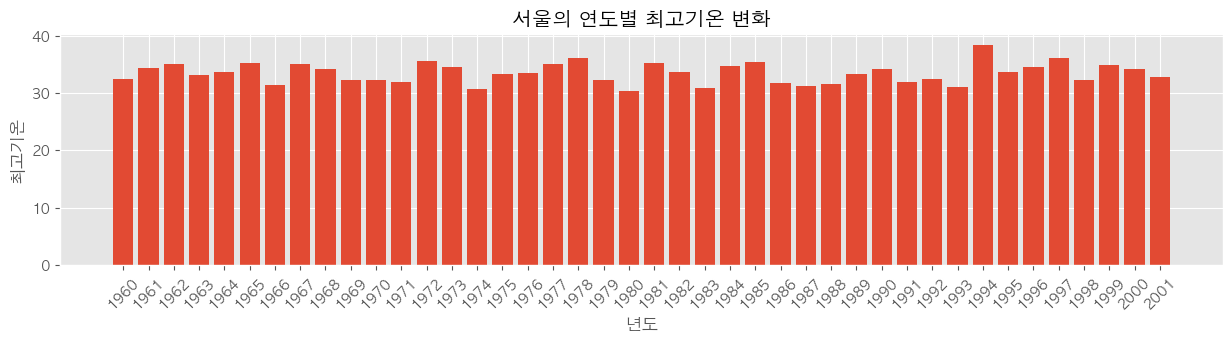

In [51]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 3))
plt.xticks(rotation=45, size=10)

plt.bar(yearMaxTa_df['year'], yearMaxTa_df['maxTa'], label='최고기온') # 세로막대그래프
plt.title('서울의 연도별 최고기온 변화')
plt.xlabel('년도')
plt.ylabel('최고기온')

plt.show()

## 각 년도별 7월의 최대온도 구하기 

In [56]:
df7_group = df_7.groupby(['year','month'])[['stnNm','maxTa']].max()
df7_group = df7_group.reset_index()[['year','maxTa']]
df7_group

,year,maxTa
0,1960,32.4
1,1961,34.4
2,1962,35.0
3,1963,33.1
4,1964,33.6
5,1965,35.2
6,1966,31.4
7,1967,35.0
8,1968,34.2
9,1969,32.3


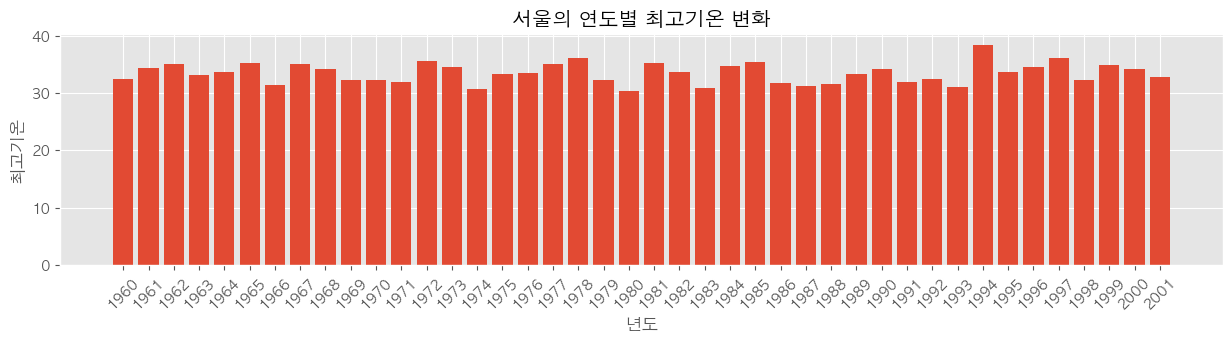

In [57]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 3))
plt.xticks(rotation=45, size=10)

plt.bar(df7_group['year'], df7_group['maxTa'], label='최고기온') # 세로막대그래프
plt.title('서울의 연도별 최고기온 변화')
plt.xlabel('년도')
plt.ylabel('최고기온')

plt.show()



## 년도별 연 평균 기온을 그래프로 출력

In [58]:
df.columns

Index(['tm', 'year', 'month', 'stnNm', 'avgTa', 'minTa', 'maxTa', 'sumRn',
       'iscs'],
      dtype='object')

In [61]:
plt_df = df.groupby('year')[['avgTa','minTa','maxTa']].mean().reset_index()
plt_df

,year,avgTa,minTa,maxTa
0,1910,10.412055,5.752603,16.008767
1,1911,10.654795,6.035616,16.001644
2,1912,10.123770,5.086885,15.646995
3,1913,10.086027,4.975068,15.651233
4,1914,12.029041,7.764658,17.061370
...,...,...,...,...
85,1997,12.956712,8.801918,17.721918
86,1998,13.835890,9.878356,18.430685
87,1999,13.256986,9.055616,17.880274
88,2000,12.713661,8.632787,17.174044


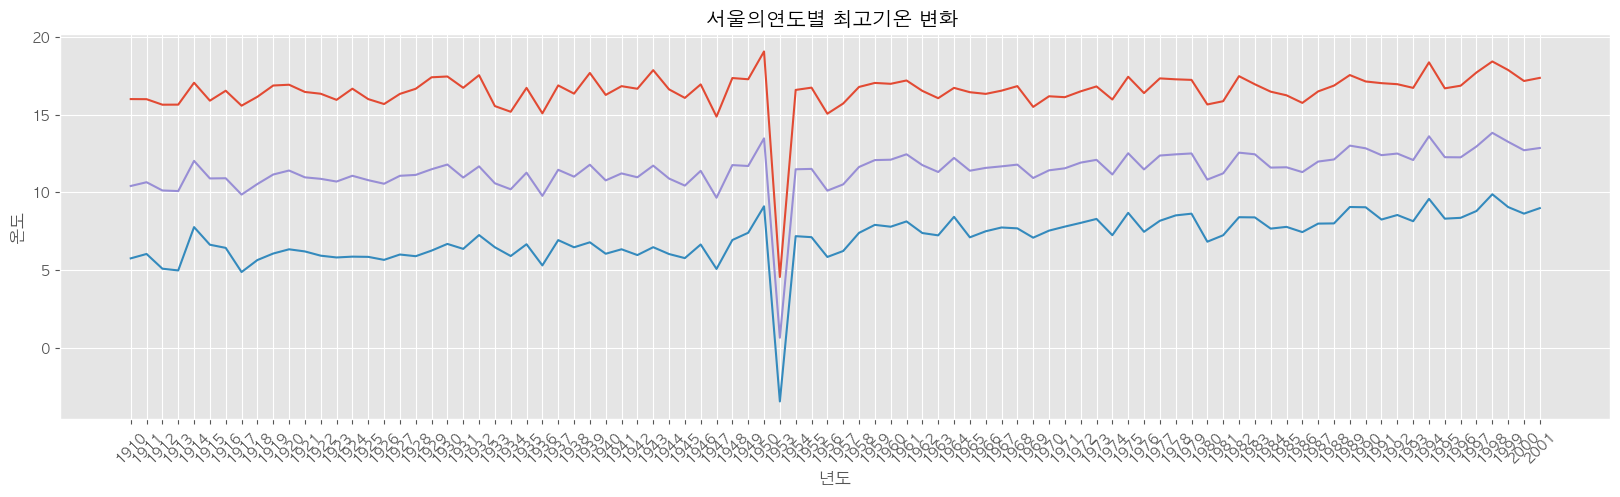

In [64]:
plt.style.use('ggplot')
plt.figure(figsize=(20,5))
plt.xticks(rotation = 45, size =10)

plt.plot(plt_df['year'],plt_df['maxTa'],label = '최고기온')
plt.plot(plt_df['year'],plt_df['minTa'],label = '최저기온')
plt.plot(plt_df['year'],plt_df['avgTa'],label = '평균온도')

plt.title('서울의연도별 최고기온 변화 ')
plt.xlabel('년도')
plt.ylabel('온도')

plt.show()